<a href="https://colab.research.google.com/github/pryplotsky/C5.-Deep-Survival-Analysis-and-Time-Varying-Covariates/blob/main/CPH004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cox Time model is taken from:
https://lifelines.readthedocs.io/en/latest/Time%20varying%20survival%20regression.html

In [1]:
#Some basic istructions:
# 1. Each line of code must be FULLY DOCUMENTED
# 2. Everything should be inside a class(classes) or functions if you don't know OOP
# 3. Please avoid using values (numbers/string/....) use instead variables
# 4. Use default values for your function arguments whenever possible

#Plan:
# We need functions/methods for:
# 1. Read, save and load a data - DONE
# 2. Pre-process the data (if needed) - DONE
# 3. Split the data into 3 sets: train(80%)  + dev (10%) + test(10%) - DONE
# 4. Obtain relevant statistics (if needed) - NOT NOW
# 5. Create Cox time ( CPH for TVC) model - In Progress
# a) Calculate C index for test set
# b) Kaplan-Meier curve (total survival distribution)
# c) Excample for 5 random observations (individual survival distribution)
# d) I don't thing CoxTimeVaryingFitter is a neutonal network. I think is a classic Cox proportional hasard, because ve dont have:
# loss function, any parametrs for validation...

In [2]:
### Install  packages and define global variables
#Basic:
import pandas as pd
import numpy as np
# 1. Read, save and load a data:
import os
import pickle
# 2. Pre-process the data 
from sklearn import preprocessing
# 3. Split the data into 3 sets
import sklearn
from sklearn.model_selection import train_test_split
# 5. Create Cox time ( CPH for TVC) model
!pip install lifelines
import matplotlib.pyplot as plt
from lifelines import CoxTimeVaryingFitter
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index

     |████████████████████████████████| 348 kB 24.1 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=13e64cd0318288fd3544afd591639b2cac36163022e6587106f08050b08f8028
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


**Main part of code**

In [3]:
### Create class Preparation with 5 methods: __init__, readdf, save, load, cleaning and splitdata
class Preparation:
  def __init__(self):# Dont use any additional attributes    
    self.df = None # Placeholders. Set varabels as none and then update a resut 
    self.X_train = None
    self.X_test = None
    self.y_train = None
    self.y_test  = None
    self.X_train = None
    self.X_val = None
    self.y_train = None
    self.y_val = None
    self.cols_standardize = ['rate_time','hpi_time', 'gdp_time']# place for variables to standartize 
### Pre-processing:
  # Read data
  def readdf (self, sep=",", filename="dcr.csv", cwd = os.getcwd()): # Method whith 3 def attributes: sep - separator, getcwd - path to your working directory
    file_name = cwd + "/" + filename # Get path of file
    data = pd.read_csv(file_name, sep= sep) # Read csv
    self.df = data # Save filtered dataset 
    return self.df # Print dataset
  # Clean data
  def cleaning (self, data,longformat=True,individual="id", stop="time", stopname="start"): 
    col1 = data.loc[:,self.cols_standardize]# separate the variables to be standartized
    col2 = data.drop(columns=self.cols_standardize)# separate the variables not to be standartized
    standard = preprocessing.scale(col1)# standardization of variables
    df2 = pd.DataFrame(standard, columns=self.cols_standardize)# to dataframe
    df3=pd.concat([col2,df2], axis=1)# merge 2 df
    data2 = df3.drop_duplicates() #drop double row entries
    self.df = data2 # Save filtered dataset
    if longformat:# Bring data into long format (necessary for using the lifeline package's Cox’s time varying proportional hazard model) 
        data2[stopname] = data2.groupby(individual)[stop].shift(1)
        data2[stopname] = data2[stopname].fillna(0)
        self.df = data2 # Save filtered dataset
        return self.df # Print dataset
### Saving and load objects as binary mode
  def save (self, dataname, dataframe , cwd = os.getcwd()):# Saving and load objects as binary mode
    with open( cwd + '/' + dataname + '.pkl','wb') as path_name: # save df, 'wb' specifies 'write'
      pickle.dump(dataframe, path_name)  
  def load (self, dataname, cwd = os.getcwd()):# Saving and load objects as binary mode
    with open( cwd + '/' + dataname + '.pkl' ,'rb') as path_name:# load df, 'rb' specifies 'read'
      dataframe = pickle.load(path_name)
      return dataframe # Print dataset
### Split the data into 3 sets: train(80%)  + dev (10%) + test(10%)  
  def splitdata (self, Xvar, yvar, perc_test=0.1, perc_val=1/9,  shuffle=False):# Method needs 5 arguments: X set with independent vars, y - set w. dependent vars, perc_test=percentage for test set, perc_val=valuation set (=(1-perc_test)*perc_val) 
    self.X_train, self.X_test, self.y_train, self.y_test = sklearn.model_selection.train_test_split(Xvar, yvar, test_size=perc_test,  shuffle=shuffle)# Split data not randomly to train 90% and test 10%
    self.X_train, self.X_val, self.y_train, self.y_val = sklearn.model_selection.train_test_split(self.X_train, self.y_train, test_size=perc_val,  shuffle=shuffle) # Split train data not randomly to train 80% and valid 10%
    print(len(self.X_train), len(self.X_val), len(self.X_test)) # len - length 

**Testing**

In [4]:
temp=Preparation()
newdf = temp.readdf()
www2=temp.cleaning(newdf)
temp.save('qwer', newdf)
temp.splitdata(www2.loc[:,www2.columns != "status_time"], yvar=www2.status_time)
temp.X_train

49712 6214 6214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,lgd_time,recovery_res,rate_time,hpi_time,gdp_time,start
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,4.7,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.527288,0.775016,0.0
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,4.7,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.484264,0.392294,25.0
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,4.4,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.386286,0.499958,26.0
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,4.6,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.287946,-0.079699,27.0
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,4.5,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.204791,0.157680,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49745,38915,33,19,21,139,NaN,345078.63,78.260975,5.500,5.0,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-0.127495,-0.280491,32.0
49746,38915,34,19,21,139,NaN,342503.68,80.889828,5.500,5.8,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-0.386721,-0.869748,33.0
49747,38915,35,19,21,139,NaN,340946.07,86.115630,5.500,6.5,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-0.793819,-2.144884,34.0
49748,38915,36,19,21,139,NaN,338314.04,91.436004,5.500,7.8,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-1.177416,-2.508644,35.0


**Cox Time**

In [146]:
eval_time=36

In [147]:
X_train=temp.X_train
y_train=temp.y_train
#df_one = pd.get_dummies(X_train["state_orig_time"])
df_full=X_train[['id','time','start','balance_time', 'LTV_time', 'interest_rate_time', 'rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time','REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time','default_time']]
df2=pd.concat([df_full,  y_train], axis=1)


df2b=df2.loc[df2['time']>=(df2['time'].max()-eval_time)]

df3=df2b.dropna()
df3

,id,time,start,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,default_time,status_time
0,4,25,0.0,61031.10,33.911009,10.500,2.694535,1.527288,0.775016,4.7,63750.0,587,81.8,10.5,97.99,0,0,1,0,0
1,4,26,25.0,60882.42,34.007232,10.500,2.694535,1.484264,0.392294,4.7,63750.0,587,81.8,10.5,97.99,0,0,1,0,0
2,4,27,26.0,60729.80,34.335349,10.500,2.694535,1.386286,0.499958,4.4,63750.0,587,81.8,10.5,97.99,0,0,1,0,0
3,4,28,27.0,60576.14,34.672545,10.875,2.694535,1.287946,-0.079699,4.6,63750.0,587,81.8,10.5,97.99,0,0,1,0,0
4,4,29,28.0,60424.39,34.951639,10.875,2.694535,1.204791,0.157680,4.5,63750.0,587,81.8,10.5,97.99,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49745,38915,33,32.0,345078.63,78.260975,5.500,-0.538972,-0.127495,-0.280491,5.0,367500.0,788,78.6,5.5,191.42,0,0,1,0,0
49746,38915,34,33.0,342503.68,80.889828,5.500,-0.538972,-0.386721,-0.869748,5.8,367500.0,788,78.6,5.5,191.42,0,0,1,0,0
49747,38915,35,34.0,340946.07,86.115630,5.500,-0.538972,-0.793819,-2.144884,6.5,367500.0,788,78.6,5.5,191.42,0,0,1,0,0
49748,38915,36,35.0,338314.04,91.436004,5.500,-0.538972,-1.177416,-2.508644,7.8,367500.0,788,78.6,5.5,191.42,0,0,1,0,0


In [148]:
X_test=temp.X_test
y_test=temp.y_test
#df_one_test = pd.get_dummies(X_test["state_orig_time"])
df_full_test=X_test[['id','time','start','balance_time', 'LTV_time', 'interest_rate_time', 'rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time','REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time','default_time']]
df2_test=pd.concat([df_full_test,  y_test], axis=1)

df2_testb=df2_test.loc[df2_test['time']>=(df2_test['time'].max()-eval_time)]

df3_test=df2_testb.dropna()
df3_test

,id,time,start,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,default_time,status_time
55964,44133,51,50.0,515035.87,100.984966,6.375,0.999865,-0.919997,-0.059292,7.8,559200.0,741,80.0,6.375,217.37,0,0,1,0,0
55965,44133,52,51.0,512766.20,98.961305,6.375,0.999865,-0.828527,-0.155510,8.0,559200.0,741,80.0,6.375,217.37,0,0,1,0,0
55966,44133,53,52.0,510460.16,91.666706,6.375,0.999865,-0.393229,-0.251759,7.6,559200.0,741,80.0,6.375,217.37,0,0,1,0,0
55967,44133,54,53.0,508117.17,87.798315,6.375,0.999865,-0.147380,0.062682,7.3,559200.0,741,80.0,6.375,217.37,0,0,1,0,0
55968,44133,55,54.0,505736.64,87.338451,6.375,0.999865,-0.143764,0.530950,7.2,559200.0,741,80.0,6.375,217.37,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62173,49972,52,0.0,180673.24,103.306966,7.500,1.233613,-0.828527,-0.155510,8.0,196000.0,708,79.8,7.500,226.29,0,0,1,0,0
62174,49972,53,52.0,179944.95,95.736862,7.500,1.233613,-0.393229,-0.251759,7.6,196000.0,708,79.8,7.500,226.29,0,0,1,0,0
62175,49972,54,53.0,179451.81,91.867079,7.500,1.233613,-0.147380,0.062682,7.3,196000.0,708,79.8,7.500,226.29,0,0,1,0,0
62176,49972,55,54.0,178952.48,91.560581,7.500,1.233613,-0.143764,0.530950,7.2,196000.0,708,79.8,7.500,226.29,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1110: ConvergenceWarning: Column default_time have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['status_time'].astype(bool)
>>> print(df.loc[events, 'default_time'].var())
>>> print(df.loc[~events, 'default_time'].var())

A very low variance means that the column default_time completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 6: norm_delta = 0.00000, step_size = 1.00000, ll = -17129.67345, newton_decrement = 0.00000, seconds_since_start = 0.4Convergence completed after 6 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 43084 periods, 3196 subjects, 2616 events>
         event col = 'status_time'
         penalizer = 0.1
number of subjects = 3196
 number of periods = 43084
  number of events = 2616
partial log-likelihood = -17129.67
  time fit was run = 2021-08-21 17:34:48 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
balance_time             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
LTV_time                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
interest_rate_time        0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
rate_time                -0.01       0.99       0.01            -0.03             0.02                 0.97                 1.02
hpi_time                  0.04       1.04       0.02             0.01             0.07                 1.01                 1.08
gdp_time                  0.03       1.03       0.01            -0.00             0.06                 1.00                 1.06
uer_time                 -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
balance_orig_time        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
FICO_orig_time           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
LTV_orig_time            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Interest_Rate_orig_time  -0.02       0.98       0.00            -0.02            -0.01                 0.98                 0.99
hpi_orig_time            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
REtype_CO_orig_time      -0.03       0.97       0.05            -0.13             0.06                 0.88                 1.06
REtype_PU_orig_time      -0.01       0.99       0.04            -0.08             0.06                 0.92                 1.06
REtype_SF_orig_time       0.03       1.03       0.03            -0.02             0.08                 0.98                 1.08
default_time              3.39      29.69       0.04             3.31             3.47                27.37                32.21

                            z      p   -log2(p)
covariate                                      
balance_time            -0.83   0.40       1.31
LTV_time                -2.88 <0.005       7.98
interest_rate_time       3.08 <0.005       8.91
rate_time               -0.58   0.56       0.83
hpi_time                 2.88 <0.005       7.99
gdp_time                 1.80   0.07       3.79
uer_time                -0.33   0.74       0.43
balance_orig_time       -0.15   0.88       0.18
FICO_orig_time          -2.10   0.04       4.82
LTV_orig_time           -0.08   0.94       0.09
Interest_Rate_orig_time -3.76 <0.005      12.53
hpi_orig_time           -2.62   0.01       6.83
REtype_CO_orig_time     -0.71   0.48       1.07
REtype_PU_orig_time     -0.38   0.70       0.51
REtype_SF_orig_time      1.21   0.23       2.14
default_time            81.59 <0.005        inf
---
Partial AIC = 34291.35
log-likelihood ratio test = 4660.65 on 16 df
-log2(p) of ll-ratio test = inf

0        0.817061
1        0.820154
2        0.842880
3        0.864331
4        0.876153
          ...    
5970     0.836066
5971     0.859483
5972     0.881275
5973     0.893059
5974    26.382580
Length: 5975, dtype: float64

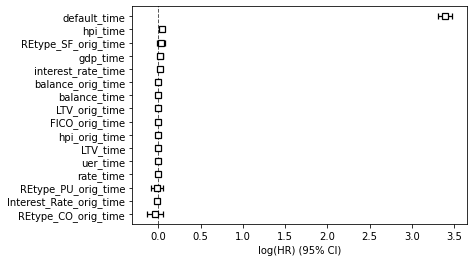

In [149]:
ctv = CoxTimeVaryingFitter(penalizer=0.1)
ctv.fit(df3, id_col="id", event_col="status_time", start_col="start", stop_col="time", show_progress=True )
ctv.print_summary() #summary of the fitted model with different values of the parametric partial hazard and Partial AIC
ctv.plot() #visiualizaton of the covariates and how they are distributed
ctv.predict_partial_hazard(df3_test) #predicting the partial hazard

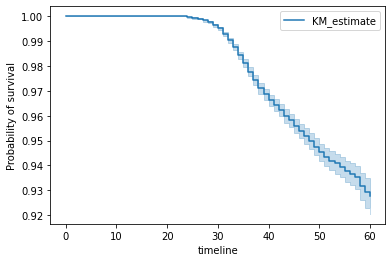

In [150]:
survival = KaplanMeierFitter() #
survival.fit(df3['time'], df3['default_time']) #Survival Curve for our dataset
survival.plot() #plot the Curve
plt.ylabel("Probability of survival")
plt.show()
plt.close()

In [151]:
concordance_index(df3_test['time'], ctv.predict_partial_hazard(df3_test)) #calculate the C-Index

0.4444360532321303

In [ ]:
concordance_index()

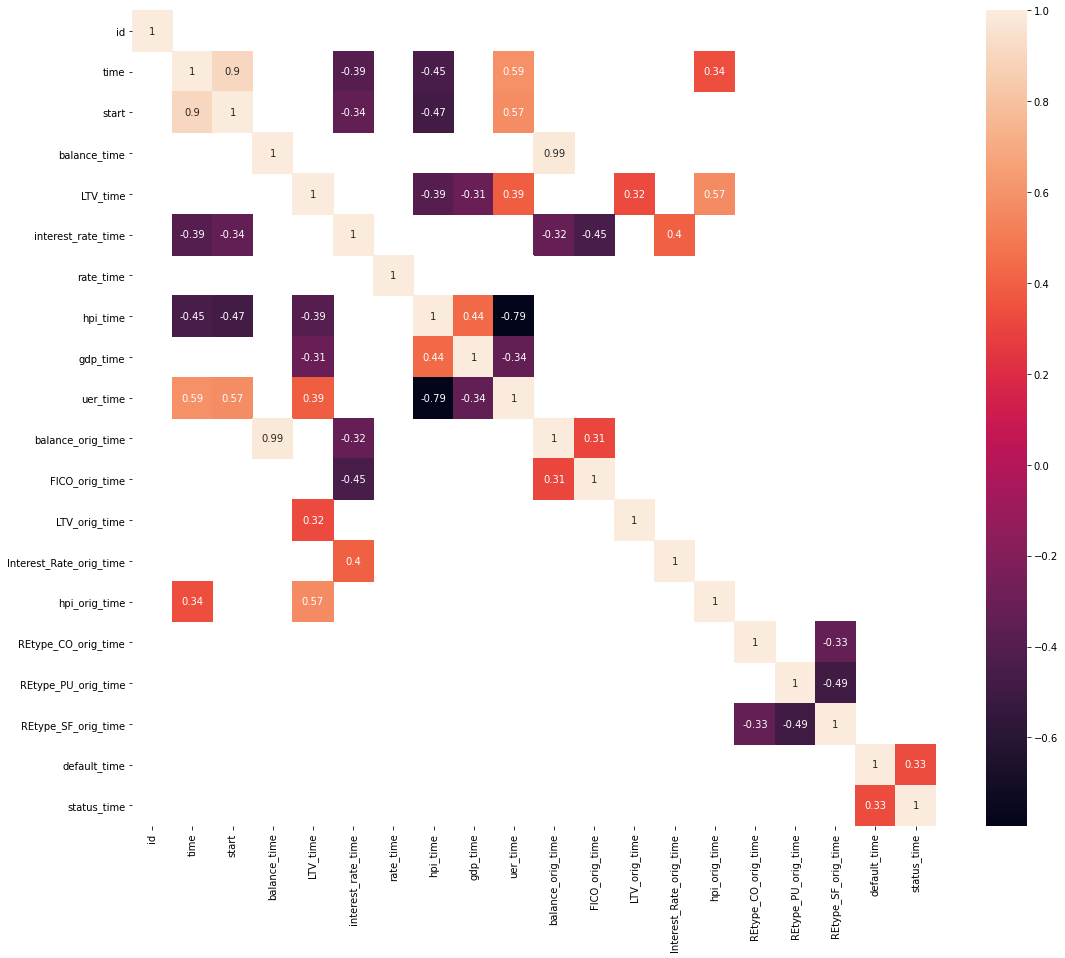

In [40]:
import seaborn as sns

corr= df3.corr()

f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)], #plot a correlation heatmap with only values exceeding absolute 0.30
            annot=True);